# Walmart GeoLocations-Analysis

In [1]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from census import Census
import gmaps
import warnings
warnings.filterwarnings('ignore')
# Google developer API key
from config_walmart import gkey
import folium

# Access maps with unique API key
gmaps.configure(api_key=gkey)

In [2]:

url="http://api.walmartlabs.com/v1/stores?apiKey=rrvpb4x3az8mubaxka7uvhkj&city=California&format=json"
res=requests.get(url).json()

df=json_normalize(res)
df.head()

,city,coordinates,country,name,no,phoneNumber,stateProvCode,streetAddress,sundayOpen,timezone,zip
0,Fairfield,"[-122.0352432, 38.2790814]",US,Fairfield Supercenter,2048,707-428-4792,CA,2701 N Texas St,True,PST,94533
1,Ukiah,"[-123.196989, 39.133706]",US,Ukiah Store,2052,707-468-0258,CA,1155 Airport Park Blvd,True,PST,95482
2,Willows,"[-122.21772, 39.525898]",US,Willows Supercenter,2053,530-934-2054,CA,470 N Airport Rd,True,PST,95988
3,Long Beach,"[-118.147723, 33.86142]",US,Long Beach Supercenter,4101,424-296-6525,CA,3705 E South St,True,PST,90805
4,Jackson,"[-120.806192, 38.35793]",US,Jackson Store,2054,209-223-5384,CA,10355 Wicklow Way,True,PST,95642


In [3]:
l=df['coordinates']
z=[]
for i in l:
    for j in reversed(i):
        z.append(j)
N=2
lat=[]
lon=[]
subList = [z[n:n+N] for n in range(0, len(z), N)]
for i in subList:
    lat.append(i[0])
    lon.append(i[1])
lat
location_df=pd.DataFrame({'lati':lat,
                         'longi':lon})
location_df.head()

,lati,longi
0,38.279081,-122.035243
1,39.133706,-123.196989
2,39.525898,-122.217720
3,33.861420,-118.147723
4,38.357930,-120.806192


In [4]:
df_CA=df['name']
t=len(df_CA)
sc=0
s=0
nm=0
city='California'
for i in df_CA:
    if 'Supercenter' in i.split():
        sc=sc+1
    elif 'Store' in i.split():
        s=s+1
    else:
        nm=nm+1
print(f"Total number of Walmarts in {city}:{t}\nTotal number of Supercenters:{sc}\nTotal number of Stores:{s}\nTotal number of Neighborhood Markets:{nm}")

Total number of Walmarts in California:536
Total number of Supercenters:141
Total number of Stores:73
Total number of Neighborhood Markets:322


In [5]:
walmart_map = folium.Map(location=[37.229564,-120.047533], zoom_start=13) # generate map centred around the Conrad Hotel

for lat, lon ,label in zip(location_df['lati'],location_df['longi'],df['name']):
    folium.features.CircleMarker(
        [lat, lon],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(walmart_map)

# display map
walmart_map

In [6]:
fig = gmaps.figure(map_type='SATELLITE')
# generate some (latitude, longitude) pairs
locations =subList
heatmap_layer = gmaps.heatmap_layer(locations)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [7]:
url1="http://api.walmartlabs.com/v1/stores?apiKey=rrvpb4x3az8mubaxka7uvhkj&city=SanJose&format=json"
res1=requests.get(url1).json()

df_SanJose=json_normalize(res1)
df_SanJose

,city,coordinates,country,name,no,phoneNumber,stateProvCode,streetAddress,sundayOpen,timezone,zip
0,San Jose,"[-121.860387, 37.331034]",US,San Jose Supercenter,5435,408-885-1142,CA,777 Story Rd,True,PST,95122
1,San Jose,"[-121.871095, 37.31621]",US,San Jose Neighborhood Market,4174,408-454-4508,CA,1450 Monterey Rd,True,PST,95112
2,San Jose,"[-121.973182, 37.321668]",US,San Jose Neighborhood Market,2486,408-556-4505,CA,4080 Stevens Creek Blvd,True,PST,95129
3,San Jose,"[-121.880176, 37.255456]",US,San Jose Supercenter,5884,408-600-3072,CA,5095 Almaden Expy,True,PST,95118
4,San Jose,"[-121.773066, 37.313558]",US,San Jose Neighborhood Market,3023,408-826-0338,CA,4055 Evergreen Village Sq Ste 140,True,PST,95135
5,San Jose,"[-121.9887, 37.291593]",US,San Jose Neighborhood Market,3025,408-796-3823,CA,1600 Saratoga Ave Unit 501,True,PST,95129
6,Santa Clara,"[-121.9855022, 37.3900085]",US,Santa Clara Neighborhood Market,3123,408-961-3599,CA,3255 Mission College Blvd,True,PST,95054
7,Milpitas,"[-121.921182, 37.431416]",US,Milpitas Supercenter,2119,408-934-0304,CA,301 Ranch Dr,True,PST,95035
8,Fremont,"[-121.943195, 37.511302]",US,Fremont Store,2989,510-651-3301,CA,44009 Osgood Rd,True,PST,94539
9,Mountain View,"[-122.109748, 37.400846]",US,Mountain View Store,2280,650-917-0796,CA,600 Showers Dr,True,PST,94040


In [8]:

l=df_SanJose['coordinates']
z=[]
for i in l:
    for j in reversed(i):
        z.append(j)
N=2
lat=[]
lon=[]
subList1 = [z[n:n+N] for n in range(0, len(z), N)]
for i in subList1:
    lat.append(i[0])
    lon.append(i[1])
lat
location_df_SanJose=pd.DataFrame({'lati':lat,
                         'longi':lon})


fig = gmaps.figure()
markers = gmaps.marker_layer(subList1)
fig.add_layer(markers)
fig





Figure(layout=FigureLayout(height='420px'))

In [9]:
na=df_SanJose['name']
sc=[]
s=[]
nh=[]
for i in na:
    if 'Supercenter' in i.split():
        sc.append(i)
    elif 'Store' in i.split():
        s.append(i)
    else:
        nh.append(i)
sjdf=df_SanJose.set_index('name')
sjsc=sjdf.loc[sc]
sjs=sjdf.loc[s]
sjnh=sjdf.loc[nh]

sc_loc=sjsc['coordinates']
z=[]
for i in sc_loc:
    for j in reversed(i):
        z.append(j)
N=2
lat=[]
lon=[]
subList_sc = [z[n:n+N] for n in range(0, len(z), N)]
for i in subList_sc:
    lat.append(i[0])
    lon.append(i[1])

location_df_SanJose_sc=pd.DataFrame({'lati':lat,
                         'longi':lon})


s_loc=sjs['coordinates']
z=[]
for i in s_loc:
    for j in reversed(i):
        z.append(j)
N=2
lat=[]
lon=[]
subList_s = [z[n:n+N] for n in range(0, len(z), N)]
for i in subList_s:
    lat.append(i[0])
    lon.append(i[1])

location_df_SanJose_s=pd.DataFrame({'lati':lat,
                         'longi':lon})



nh_loc=sjnh['coordinates']
z=[]
for i in nh_loc:
    for j in reversed(i):
        z.append(j)
N=2
lat=[]
lon=[]
subList_nh = [z[n:n+N] for n in range(0, len(z), N)]
for i in subList_nh:
    lat.append(i[0])
    lon.append(i[1])

location_df_SanJose_nh=pd.DataFrame({'lati':lat,
                         'longi':lon})




sjsc.reset_index(inplace=True)
sjs.reset_index(inplace=True)
sjnh.reset_index(inplace=True)



fig = gmaps.figure()
markers = gmaps.marker_layer(subList1)
fig.add_layer(markers)
fig





Figure(layout=FigureLayout(height='420px'))

In [10]:
sjsc

,name,city,coordinates,country,no,phoneNumber,stateProvCode,streetAddress,sundayOpen,timezone,zip
0,San Jose Supercenter,San Jose,"[-121.860387, 37.331034]",US,5435,408-885-1142,CA,777 Story Rd,True,PST,95122
1,San Jose Supercenter,San Jose,"[-121.880176, 37.255456]",US,5884,408-600-3072,CA,5095 Almaden Expy,True,PST,95118
2,San Jose Supercenter,San Jose,"[-121.860387, 37.331034]",US,5435,408-885-1142,CA,777 Story Rd,True,PST,95122
3,San Jose Supercenter,San Jose,"[-121.880176, 37.255456]",US,5884,408-600-3072,CA,5095 Almaden Expy,True,PST,95118
4,Milpitas Supercenter,Milpitas,"[-121.921182, 37.431416]",US,2119,408-934-0304,CA,301 Ranch Dr,True,PST,95035
5,Morgan Hill Supercenter,Morgan Hill,"[-121.655172, 37.149211]",US,5766,408-779-8172,CA,170 Cochrane Plz,True,PST,95037
6,Gilroy Supercenter,Gilroy,"[-121.551183, 37.008583]",US,2002,408-848-8161,CA,7150 Camino Arroyo,True,PST,95020
7,Tracy Supercenter,Tracy,"[-121.471986, 37.751554]",US,2025,209-836-5786,CA,3010 W Grant Line Rd,True,PST,95304
8,Patterson Supercenter,Patterson,"[-121.142722, 37.462266]",US,5843,209-895-4407,CA,1030 Sperry Ave,True,PST,95363
9,Antioch Supercenter,Antioch,"[-121.761615, 37.96348]",US,2697,925-755-0900,CA,4893 Lone Tree Way,True,PST,94531


In [11]:
df_SJ=df_SanJose['name']
t=len(df_SJ)
sc=0
s=0
nm=0
city='SanJose'
for i in df_SJ:
    if 'Supercenter' in i.split():
        sc=sc+1
    elif 'Store' in i.split():
        s=s+1
    else:
        nm=nm+1
print(f"Total number of Walmarts in {city}:{t}\nTotal number of Supercenters:{sc}\nTotal number of Stores:{s}\nTotal number of Neighborhood Markets:{nm}")

Total number of Walmarts in SanJose:29
Total number of Supercenters:12
Total number of Stores:10
Total number of Neighborhood Markets:7


In [12]:
walmart_map_SanJose = folium.Map(location=[37.229564,-120.047533], zoom_start=13) # generate map centred around the Conrad Hotel
for lat, lon ,label in zip(location_df_SanJose_sc['lati'],location_df_SanJose_sc['longi'],sjsc['name']):
    folium.features.CircleMarker(
        [lat, lon],
        radius=5,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(walmart_map_SanJose)


for lat, lon ,label in zip(location_df_SanJose_s['lati'],location_df_SanJose_s['longi'],sjs['name']):
    folium.features.CircleMarker(
        [lat, lon],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(walmart_map_SanJose)



# add the Italian restaurants as blue circle markers
for lat, lon ,label in zip(location_df_SanJose_nh['lati'],location_df_SanJose_nh['longi'],sjnh['name']):
    folium.features.CircleMarker(
        [lat, lon],
        radius=5,
        color='yellow',
        popup=label,
        fill = True,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(walmart_map_SanJose)

# display map
walmart_map_SanJose

In [13]:
l1=pd.DataFrame(df.groupby('city').count())
#l1.sort_values(by='0',ascending=False)
l1.head()

,coordinates,country,name,no,phoneNumber,stateProvCode,streetAddress,sundayOpen,timezone,zip
city,,,,,,,,,,
Agoura Hills,1,1,1,1,1,1,1,1,1,1
Alameda,1,1,1,1,1,1,1,1,1,1
American Canyon,1,1,1,1,1,1,1,1,1,1
Anaheim,7,7,7,7,7,7,7,7,7,7
Anderson,1,1,1,1,1,1,1,1,1,1


In [14]:
l1=l1.reset_index()
l2=l1.sort_values(by='sundayOpen',ascending=False)

In [15]:
l2.head(6)

,city,coordinates,country,name,no,phoneNumber,stateProvCode,streetAddress,sundayOpen,timezone,zip
121,Los Angeles,20,20,20,20,20,20,20,20,20,20
201,San Francisco,18,18,18,18,18,18,18,18,18,18
200,San Diego,18,18,18,18,18,18,18,18,18,18
196,Sacramento,15,15,15,15,15,15,15,15,15,15
203,San Jose,14,14,14,14,14,14,14,14,14,14
11,Bakersfield,8,8,8,8,8,8,8,8,8,8


In [16]:
city1=input("Enter the name of the city : ")

Enter the name of the city : San Jose


In [17]:
print(city1)

San Jose


In [18]:
# @hidden_cell
url4=f"http://api.walmartlabs.com/v1/stores?apiKey=rrvpb4x3az8mubaxka7uvhkj&city={city1}&format=json"


In [19]:

print(city1)
res4=requests.get(url4).json()
dff=json_normalize(res4)

dff2=dff['name']
t=len(dff2)
sc=0
s=0
nm=0

for i in dff2:
    if 'Supercenter' in i.split():
        sc=sc+1
    elif 'Store' in i.split():
        s=s+1
    else:
        nm=nm+1
print(f"Total number of Walmarts in {city1}:{t}\nTotal number of Supercenters:{sc}\nTotal number of Stores:{s}\nTotal number of Neighborhood Markets:{nm}")

San Jose
Total number of Walmarts in San Jose:29
Total number of Supercenters:12
Total number of Stores:10
Total number of Neighborhood Markets:7


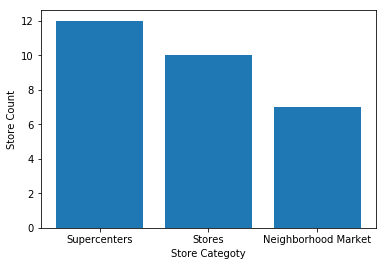

In [20]:
import matplotlib.pyplot as plt
x=["Supercenters","Stores","Neighborhood Market"]
y=[sc,s,nm]
plt.bar(x,y)
plt.xlabel('Store Categoty')
plt.ylabel('Store Count')
plt.show()


In [21]:
dff

,city,coordinates,country,name,no,phoneNumber,stateProvCode,streetAddress,sundayOpen,timezone,zip
0,San Jose,"[-121.860387, 37.331034]",US,San Jose Supercenter,5435,408-885-1142,CA,777 Story Rd,True,PST,95122
1,San Jose,"[-121.871095, 37.31621]",US,San Jose Neighborhood Market,4174,408-454-4508,CA,1450 Monterey Rd,True,PST,95112
2,San Jose,"[-121.973182, 37.321668]",US,San Jose Neighborhood Market,2486,408-556-4505,CA,4080 Stevens Creek Blvd,True,PST,95129
3,San Jose,"[-121.880176, 37.255456]",US,San Jose Supercenter,5884,408-600-3072,CA,5095 Almaden Expy,True,PST,95118
4,San Jose,"[-121.773066, 37.313558]",US,San Jose Neighborhood Market,3023,408-826-0338,CA,4055 Evergreen Village Sq Ste 140,True,PST,95135
5,San Jose,"[-121.9887, 37.291593]",US,San Jose Neighborhood Market,3025,408-796-3823,CA,1600 Saratoga Ave Unit 501,True,PST,95129
6,Santa Clara,"[-121.9855022, 37.3900085]",US,Santa Clara Neighborhood Market,3123,408-961-3599,CA,3255 Mission College Blvd,True,PST,95054
7,Milpitas,"[-121.921182, 37.431416]",US,Milpitas Supercenter,2119,408-934-0304,CA,301 Ranch Dr,True,PST,95035
8,Fremont,"[-121.943195, 37.511302]",US,Fremont Store,2989,510-651-3301,CA,44009 Osgood Rd,True,PST,94539
9,Mountain View,"[-122.109748, 37.400846]",US,Mountain View Store,2280,650-917-0796,CA,600 Showers Dr,True,PST,94040


In [22]:
zipcode=input("Enter the zipcode of the city : ")

Enter the zipcode of the city : 95129


In [23]:

url5=f"http://api.walmartlabs.com/v1/stores?apiKey=rrvpb4x3az8mubaxka7uvhkj&zip={zipcode}&format=json"
res5=requests.get(url5).json()
df=json_normalize(res5)
df.head()

,city,coordinates,country,name,no,phoneNumber,stateProvCode,streetAddress,sundayOpen,timezone,zip
0,San Jose,"[-121.9887, 37.291593]",US,San Jose Neighborhood Market,3025,408-796-3823,CA,1600 Saratoga Ave Unit 501,True,PST,95129
1,San Jose,"[-121.973182, 37.321668]",US,San Jose Neighborhood Market,2486,408-556-4505,CA,4080 Stevens Creek Blvd,True,PST,95129
2,Santa Clara,"[-121.9855022, 37.3900085]",US,Santa Clara Neighborhood Market,3123,408-961-3599,CA,3255 Mission College Blvd,True,PST,95054
3,San Jose,"[-121.871095, 37.31621]",US,San Jose Neighborhood Market,4174,408-454-4508,CA,1450 Monterey Rd,True,PST,95112
4,San Jose,"[-121.880176, 37.255456]",US,San Jose Supercenter,5884,408-600-3072,CA,5095 Almaden Expy,True,PST,95118


In [24]:
c = Census("85ac64b6b5a9c0901b00329d1ef41f0c53ccfc98", year=2014)

census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E","B19301_001E",
                          "B17001_002E","B01001_002E","B01001_026E","B01001_001E","B01001_003E","B01001_004E",
                          "B01001_005E","B01001_006E","B01001_007E","B01001_008E","B01001_009E",
                          "B01001_010E","B01001_011E","B01001_012E","B01001_013E","B01001_014E","B01001_015E",
                          "B01001_016E","B01001_017E","B01001_018E","B01001_019E","B01001_020E","B01001_021E",
                          "B01001_022E","B01001_023E","B01001_024E","B01001_025E",
                          "B15003_025E","B15003_024E","B15003_023E","B15003_022E","B15003_021E","B15003_020E",
                          "B01001_027E","B01001_028E","B01001_029E","B01001_030E","B01001_031E","B01001_032E",
                          "B01001_033E","B01001_034E","B01001_035E","B01001_036E","B01001_037E","B01001_038E",
                          "B01001_039E","B01001_040E","B01001_041E","B01001_042E","B01001_043E","B01001_044E",
                          "B01001_045E","B01001_046E","B01001_047E","B01001_048E","B01001_049E",
                          "B15003_019E","B15003_018E"), {'for': 'zip code tabulation area:*'})


In [25]:
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count","B01001_002E":"Male",
                                        "B01001_026E":"Female",
                                        "B01001_001E":"Total",
                                        "B01001_003E":"MaleUnder5",
                                        "B01001_004E":"Male 6-9",
                                        "B01001_005E":"Male 10-14",
                                        "B01001_006E":"Male 15-17",
                                        "B01001_007E":"Male 18-19",
                                        "B01001_008E":"Male 20",
                                        "B01001_009E":"Male 21",
                                        "B01001_010E":"Male 22-24",
                                        "B01001_011E":"Male 25 - 29",
                                        "B01001_012E":"Male 30-34",
                                        "B01001_013E": "Male 35-39",
                                        "B01001_014E":"Male 40-44",
                                        "B01001_015E":"Male 45-49",
                                        "B01001_016E": "Male 50-54",
                                        "B01001_017E":"Male 55-59",
                                        "B01001_018E":"Male 60-61",
                                        "B01001_019E":"Male 62-64",
                                        "B01001_020E":"Male 65-66",
                                        "B01001_021E":"Male 67-69",
                                        "B01001_022E":"Male 70-74",
                                        "B01001_023E":"Male 75-79",
                                        "B01001_024E":"Male 80-84",
                                        "B01001_025E":"Male 85 and older",
                                        "B01001_027E":"Female Under5",
                                        "B01001_028E":"Female 6-9",
                                        "B01001_029E":"Female 10-14",
                                        "B01001_030E":"Female 15-17",
                                        "B01001_031E":"Female 18-19",
                                        "B01001_032E":"Female 20",
                                        "B01001_033E":"Female 21",
                                        "B01001_034E":"Female 22-24",
                                        "B01001_035E":"Female 25 - 29",
                                        "B01001_036E":"Female 30-34",
                                        "B01001_037E": "Female 35-39",
                                        "B01001_038E":"Female 40-44",
                                        "B01001_039E":"Female 45-49",
                                        "B01001_040E": "Female 50-54",
                                        "B01001_041E":"Female 55-59",
                                        "B01001_042E":"Female 60-61",
                                        "B01001_043E":"Female 62-64",
                                        "B01001_044E":"Female 65-66",
                                        "B01001_045E":"Female 67-69",
                                        "B01001_046E":"Female 70-74",
                                        "B01001_047E":"Female 75-79",
                                        "B01001_048E":"Female 80-84",
                                        "B01001_049E":"Female 85 and older",
                                      "B15003_025E":"education_doctorate",
                                         "B15003_024E":"education_professional",
                                          "B15003_023E":"education_masters",
                                          "B15003_022E":"education_bachelors",
                                          "B15003_021E":"education_associates",
                                          "B15003_020E":"education_ged",
                                          "B15003_019E":"education_high_school",
                                          "B15003_018E":"education_none",
                                      "NAME": "NAME", "zip code tabulation area": "Zipcode"})



# Add in Poverty Rate (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * \
    census_pd["Poverty Count"].astype(
        int) / census_pd["Population"].astype(int)
#Add index
index1= census_pd["Zipcode"]

#census_pd1 = pd.DataFrame(columns = census_data, index = index1)

# Final DataFrame
census_pd = census_pd[["Zipcode", "Population", "Median Age", "Household Income","Per Capita Income", "Poverty Count", "Poverty Rate"]]

# Visualize
print(len(census_pd))
census_pd.head()

33120


,Total,Male,MaleUnder5,Male 6-9,Male 10-14,Male 15-17,Male 18-19,Male 20,Male 21,Male 22-24,...,education_bachelors,education_masters,education_professional,education_doctorate,Poverty Count,Household Income,Per Capita Income,NAME,Zipcode,Poverty Rate
0,18088.0,8824.0,523.0,581.0,681.0,430.0,295.0,182.0,144.0,305.0,...,1617.0,233.0,58.0,70.0,10911.0,10833.0,7229.0,ZCTA5 00601,00601,60.321760
1,40859.0,20079.0,1088.0,1283.0,1271.0,935.0,622.0,429.0,234.0,828.0,...,4440.0,1110.0,197.0,217.0,21724.0,16353.0,9048.0,ZCTA5 00602,00602,53.168213
2,53162.0,25971.0,1453.0,1776.0,1816.0,1174.0,786.0,327.0,447.0,1033.0,...,5407.0,1599.0,254.0,319.0,26027.0,16323.0,9888.0,ZCTA5 00603,00603,48.957902
3,6415.0,3188.0,270.0,197.0,215.0,156.0,96.0,51.0,82.0,104.0,...,419.0,28.0,17.0,33.0,3778.0,14138.0,6385.0,ZCTA5 00606,00606,58.893219
4,28805.0,13958.0,753.0,757.0,1171.0,683.0,446.0,186.0,205.0,638.0,...,1999.0,467.0,41.0,162.0,14149.0,17265.0,8197.0,ZCTA5 00610,00610,49.119944
